In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.multivariate_normal?

In [3]:
mean_1 = np.array([5, 10])
cov_1 = np.array([[1, 0.3], [0.3, 1]])

In [4]:
mean_2 = np.array([0, 0])
cov_2 = np.array([[1, 0.2], [0.2, 1]])

In [5]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 1000)

In [6]:
print(dist_1.shape, dist_2.shape)

(1000, 2) (1000, 2)


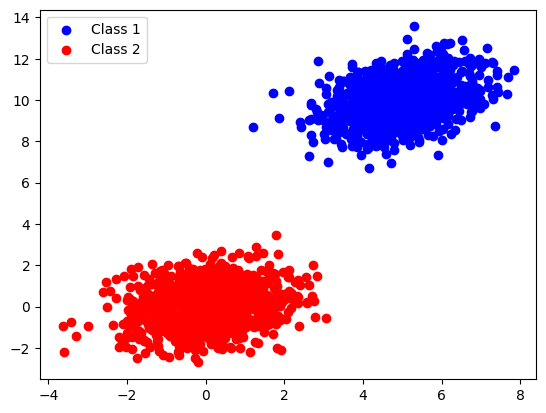

In [7]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'blue', label = 'Class 1')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'red', label = 'Class 2')
plt.legend()

In [8]:
dataset = np.zeros((2000, 3))
dataset[:1000, :2] = dist_1
dataset[1000:, :2] = dist_2

In [9]:
dataset[:1000, -1] = 1
print(dataset)

[[ 4.81073273 10.21737227  1.        ]
 [ 3.93621429  8.97093027  1.        ]
 [ 6.67447461 10.69218478  1.        ]
 ...
 [ 1.07170066  1.28258473  0.        ]
 [ 1.02032817 -0.98441055  0.        ]
 [ 1.52878556 -0.72180257  0.        ]]


In [10]:
np.random.shuffle(dataset)

In [11]:
dataset

array([[ 5.47799945,  9.72938167,  1.        ],
       [ 4.53234272, 10.60500417,  1.        ],
       [ 1.19201629, -0.80204395,  0.        ],
       ...,
       [ 6.68503214, 11.72408043,  1.        ],
       [ 5.07116914,  9.19731684,  1.        ],
       [-0.97178588, -0.03950515,  0.        ]])

In [12]:
split = 0.8

train_X = dataset[:int(split*dataset.shape[0]), :-1]
train_Y = dataset[:int(split*dataset.shape[0]), -1]
test_X = dataset[int(split*dataset.shape[0]):, :-1]
test_Y = dataset[int(split*dataset.shape[0]):, -1]

In [13]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(1600, 2) (1600,) (400, 2) (400,)


In [14]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [15]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [16]:
def cost(X, Y, theta):
    y_pred = hypothesis(X, theta)
    loss = np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))
    return -1 * loss

In [17]:
def gradient(X, Y, weights):
    
    y_pred = hypothesis(X, weights)

    grad = np.dot(X.T, (Y - y_pred))
        
    return grad/X.shape[0]

In [18]:
def gradient_descent(X, Y):
    lr_rate = 0.03
    weight = np.zeros((X.shape[1], ))
    
    loss_epoch = []
    epoch = 5000
    
    for i in range(epoch):
        print(f'\rOn: {i}', end = '\r')
        grad = gradient(X, Y, weight)
        
        loss = cost(X, Y, weight)
        loss_epoch.append(loss)
        
        weight = weight + lr_rate * grad
        
    return weight, loss_epoch

In [19]:
for i in range(500):
    print(f'\r {i}', end='\r')

In [20]:
ones = np.ones((train_X.shape[0], 1))
train_X = np.hstack((ones,train_X))
print(train_X.shape)

(1600, 3)


In [21]:
weight, loss_epoch = gradient_descent(train_X, train_Y)

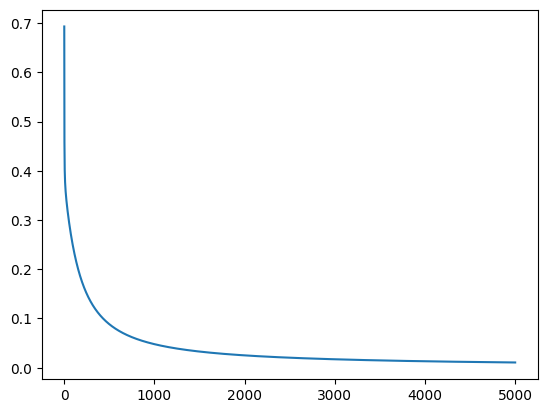

In [22]:
plt.plot(loss_epoch)

In [23]:
loss_epoch

[0.6931471805599452,
 0.5182589541795128,
 0.4584121173715542,
 0.4297986905959393,
 0.41289940890506943,
 0.4015418367432868,
 0.3932183818436307,
 0.3867282923642087,
 0.38142744049563865,
 0.3769404521297386,
 0.37303433899174626,
 0.3695571382930693,
 0.3664056870602709,
 0.3635076014101887,
 0.3608106679338478,
 0.35827632499495765,
 0.35587550903799686,
 0.35358592408568934,
 0.35139019758829976,
 0.3492746050411361,
 0.3472281692953889,
 0.34524201252257236,
 0.34330888211655336,
 0.3414227985949443,
 0.3395787905228353,
 0.33777269246484665,
 0.33600098922698807,
 0.33426069453092905,
 0.33254925560212995,
 0.330864477472321,
 0.32920446243036033,
 0.32756756122123126,
 0.3259523334349318,
 0.3243575151420093,
 0.32278199228642784,
 0.3212247786847787,
 0.319684997735331,
 0.31816186713347877,
 0.316654686037799,
 0.31516282424471687,
 0.3136857130180981,
 0.31222283728910016,
 0.310773728995896,
 0.3093379613758346,
 0.30791514405678355,
 0.3065049188217534,
 0.305106955942908

In [24]:
ones = np.ones((test_X.shape[0], 1))
test_X = np.hstack((ones,test_X))
print(test_X.shape)

(400, 3)


In [25]:
weight.shape

(3,)

In [32]:
def predict(X, theta):
    output = hypothesis(X, theta)
    y_pred = []
    for i in output:
        if i >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return np.array(y_pred)

In [33]:
test_pred = predict(test_X, weight)

In [34]:
for i in range(test_pred.shape[0]):
    print(test_pred[i], test_Y[i])

0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.

In [35]:
np.sum(test_pred == test_Y)/test_pred.shape[0]

1.0